In [1]:
# Testmodel
import email
from nltk.corpus import stopwords
import features
import pandas
from transforms import *
import sklearn
from sklearn import *

pipeline = sklearn.pipeline.Pipeline([
    ('transform_email', FunctionMapper(email.message_from_string)),
    #('train_models', sklearn.pipeline.FeatureUnion([
        #('bag_of_words_model', sklearn.pipeline.Pipeline([
            # TODO: header removal
         #   ('extract_payload', FunctionMapper(str)),
            # TODO: symbol removal
            # TODO: whitespace single character separation removal
            # TODO: lemmatize
            # Using a TFIDF vectorizer will let us inversely weight common sequences
          #  ('generate_bag_of_words', sklearn.feature_extraction.text.TfidfVectorizer(
                # Remove articles using NLTK's stopwords
                # stop_words=stopwords.words('english'),
           #     ngram_range=(1, 5),
            #    use_idf=True,
             #   sublinear_tf=True)),
            # Helps prevent synonyms
          #  ('bow_pca', sklearn.decomposition.TruncatedSVD(n_components=1000)),
           # ('select_best', sklearn.feature_selection.SelectKBest(
            #    sklearn.feature_selection.chi2,
             #   k=1000)),
            # Return the probability of spam
           # ('train_naive_bayes', MultiProbNB())
        #])),
        #('other_models', sklearn.pipeline.Pipeline([
            ('generate_features', sklearn.pipeline.FeatureUnion([
                ('content_type_features', FunctionTransformer(features.generate_content_type)),
                ('email_counts_features', FunctionTransformer(features.generate_email_counts)),
                ('case_ratio_features', FunctionTransformer(features.generate_upper_to_lower_case_ratios)),
                ('email_chain_features', FunctionTransformer(features.generate_subject_is_chain)),
                ('link_features', FunctionTransformer(features.generate_number_of_links)),
                ('mailing_list_features', FunctionTransformer(features.generate_is_mailing_list))
            ])),
            ('replace_nans', sklearn.preprocessing.Imputer(missing_values='NaN', strategy='mean')),
            #('pca', sklearn.decomposition.RandomizedPCA(whiten=True)),
            #('train_other_models', sklearn.pipeline.FeatureUnion([
                ('train_knn', ProbKNN()),
                #('train_svm', ProbSVC(probability=True))
            #]))
        #]))
    #], n_jobs=1)),
    # We have 8 possibilities by this stage
    #('select_output_class', sklearn.ensemble.RandomForestClassifier(n_estimators=32, n_jobs=1))
])

# Load processed data
dataset = pandas.read_msgpack('./data/development.msg', encoding='latin-1')
import math
dataset = dataset.sample(math.ceil(len(dataset)*0.1))

# Separate features and labels
features = dataset['email'].values
labels = dataset['class'].apply(lambda x: x == 1).values

print(len(labels))
res = sklearn.cross_validation.cross_val_score(pipeline, features, labels, cv=10, scoring='roc_auc', verbose=10, n_jobs=1)
print(res)

c:\python35\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
c:\python35\lib\site-packages\sklearn\qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


7204
[CV] no parameters to be set .........................................
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
[CV] ................ no parameters to be set, score=0.944184 - 1.4min
[CV] no parameters to be set .........................................
Function:  message_from_string


[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:  1.4min


Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
[CV] ................ no parameters to be set, score=0.944369 - 1.4min
[CV] no parameters to be set .........................................
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lowe

[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:  5.9min


Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
[CV] ................ no parameters to be set, score=0.950663 - 1.4min
[CV] no parameters to be set .........................................
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lowe

[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed: 10.5min


Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
[CV] ................ no parameters to be set, score=0.947637 - 1.4min
[CV] no parameters to be set .........................................
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lowe

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 14.7min finished


In [7]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

###############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(labels, n_folds=10)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr_fpr = []
for i, (train, test) in enumerate(cv):
    print('---CV: %d' % (i))
    probas_ = pipeline.fit(features[train], labels[train]).predict_proba(features[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(labels[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    all_tpr_fpr.append((tpr,fpr))

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

---CV: 0
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
---CV: 1
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Function:  generate_is_mailing_list
Function:  message_from_string
Function:  generate_content_type
Function:  generate_email_counts
Function:  generate_upper_to_lower_case_ratios
Function:  generate_subject_is_chain
Function:  generate_number_of_links
Functi

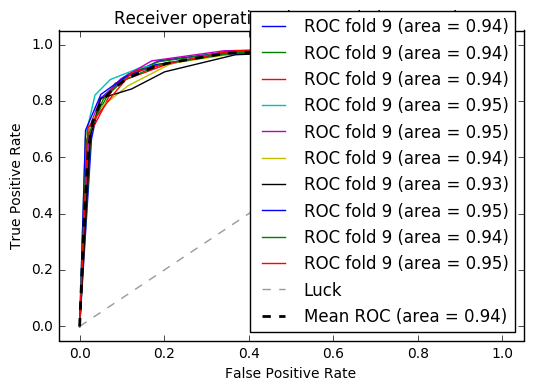

In [10]:
for (tpr, fpr) in all_tpr_fpr:  
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')


plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()